In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

C:\Users\hjy\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.9.1


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
%precision 3
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.031, -0.577,  0.775, -0.604,  0.227, -0.291, -0.589, -0.251,
        -0.154, -1.067]], dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.117, 0.063, 0.245, 0.062, 0.142, 0.085, 0.063, 0.088, 0.097,
        0.039]], dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.4706995

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3014 - accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1465 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0861 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0744 - accuracy: 0.9763


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0720 - accuracy: 0.9782 - 402ms/epoch - 1ms/step


[0.072, 0.978]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
import numpy as np
p= probability_model(x_test[:10])
print(p)
v = np.argmax(p,axis=-1)
print(v)

tf.Tensor(
[[6.213e-08 1.213e-07 5.465e-06 4.289e-04 6.037e-11 1.055e-06 2.251e-13
  9.995e-01 2.999e-07 3.083e-05]
 [1.109e-07 9.080e-05 9.999e-01 1.129e-05 3.858e-17 4.315e-06 9.418e-09
  4.007e-12 4.692e-07 1.053e-11]
 [5.429e-07 9.994e-01 2.837e-05 5.841e-06 5.953e-06 6.800e-06 1.141e-05
  3.698e-04 1.316e-04 2.026e-07]
 [9.998e-01 8.135e-09 1.371e-04 4.726e-08 1.089e-07 1.234e-06 2.250e-05
  1.560e-06 1.003e-08 6.046e-06]
 [4.114e-07 6.280e-11 2.164e-06 1.253e-08 9.979e-01 1.769e-08 2.607e-06
  3.533e-06 2.318e-07 2.119e-03]
 [3.000e-08 9.998e-01 1.655e-07 5.121e-07 1.372e-06 3.353e-08 1.158e-08
  1.470e-04 8.201e-06 2.544e-08]
 [1.987e-09 1.953e-08 5.332e-07 1.759e-08 9.990e-01 8.200e-06 1.742e-07
  9.764e-06 6.280e-04 3.917e-04]
 [8.627e-09 2.209e-06 1.477e-05 9.189e-04 4.437e-03 1.944e-05 1.743e-10
  1.638e-03 4.425e-07 9.930e-01]
 [8.510e-10 8.789e-10 1.992e-04 5.086e-08 8.612e-08 9.850e-01 1.467e-02
  2.988e-09 1.285e-05 1.334e-04]
 [4.334e-10 1.031e-10 2.608e-09 4.935e-07 7.

In [13]:
from matplotlib import pyplot as plt
digit=(x_train[4]*255).astype('uint8')


In [14]:
digit


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

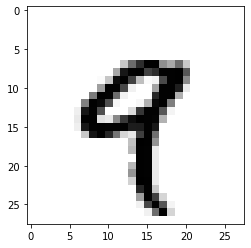

In [15]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

7 7


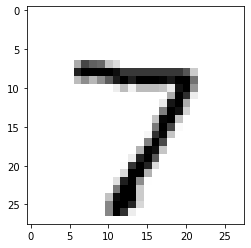

2 2


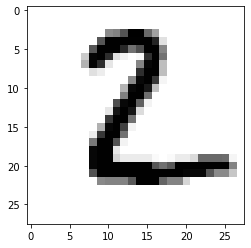

1 1


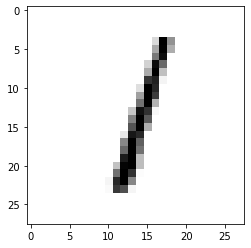

0 0


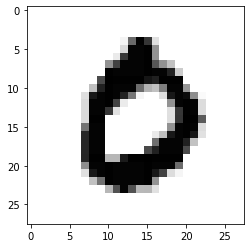

4 4


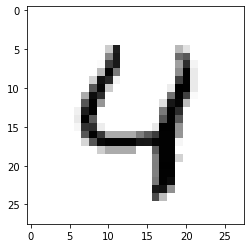

1 1


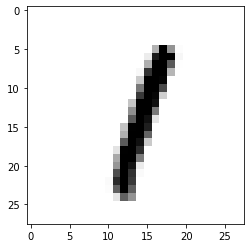

4 4


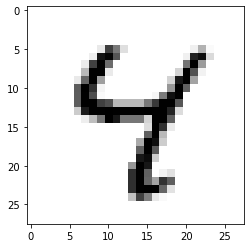

9 9


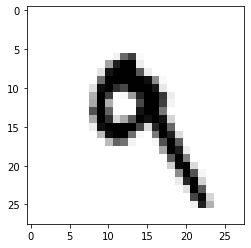

5 5


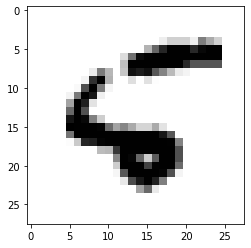

9 9


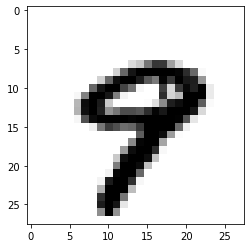

In [16]:
for i in range(10):
    plt.imshow((x_test[i]*255).astype('uint8'), cmap=plt.cm.binary)
    print(y_test[i], v[i])
    plt.show()